# GML - Mini-Challenge 1 - FS 2022

**Ausgabe:** Montag, 21. März 2022  
**Abgabe:** Sonntag, 24. April 2022, bis 24 Uhr 

In dieser Mini-Challenge implementieren und verwenden wir verschiedene Supervised Learning-Methoden und machen Gebrauch von Model Selection-Prinzipien und -Algorithmen.

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln zahlreiche Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss von Anfang bis Ende lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. Nur was korrekt ausführt wird bewertet.
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gehört eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte lösche, dupliziere oder verschiebe die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Du darfst aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

**Ridge Regression** (siehe beispielsweise James et al., *An Introduction to Statistical Learning*, 2015, pp 215) ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion für einen Datensatz $(x^{(i)}, y^{(i)})$ mit $x^{(i)} = (x_1^{(i)}, \dots , x_p^{(i)})$ von $N$ Datenpunkten ist: 

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \beta_j^2 
\end{equation}

$(\beta_0, \beta_1, \dots, \beta_p)$ sind dabei die Modellkoeffizienten.

Es gilt zu beachten, dass bei Ridge Regression der Achsenabschnitt, i.e. der Modellkoeffizient $\beta_0$ nicht in den Penalty Term der Kostenfunktion eingeht. Das zeigt sich in obiger Gleichung durch die Summe von $i=1$ (nicht $i=0$) bis $p$ (Anzahl Prädiktoren).

Für die Optimierung der Koeffizienten bei gegebenem Datensatz ergeben sich dadurch Implikationen für Gradient Descent und Normalengleichung.  

Wenn man die Input-Variablen standardisiert, was **bei Regularisierung fast immer angezeigt** ist um sämtliche Variablen auf eine vergleichbare Skala (dimensionslose Standardabweichungen) zu bringen, und damit die zugehörigen Koeffizienten in ähnlichem Umfang zu regularisieren, ist es eine Möglichkeit das Optimierungsproblem für $\beta_0$ und die restlichen Variablen zu separieren. $\beta_0$ kann dann nämlich mit $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet werden und ist so unregularisiert. Die Koeffizienten $(\beta_1, \dots, \beta_p)$ werden dann mit Gradient Descent oder Normalengleichen optimiert.

Möchte man alle Modell-Koeffizienten, inklusive $\beta_0$, mittels Gradient Descent optimieren, so gilt es eine Fallunterscheidung bei der Berechnung des Gradienten zu machen für die Gradienten-Komponente $0$, welche zum Koeffizienten $\beta_0$ gehört, und den verbleibenden Gradienten-Komponenten $1$ bis $p$, welche zu den Modellkoeffizienten $(\beta_1, \dots, \beta_p)$ gehören. Dies deswegen, weil $\beta_0$ nicht in die Strafterm-Summe der Kostenfunktion eingeht.

### Zu Gradient Descent für Ridge Regression

Zur Verwendung von Gradient Descent muss der Gradient der Kostenfunktion berechnet werden. Der Gradient $\nabla f(\chi)$ einer Funktion $f(\cdot)$ mehrerer ($m$) Variablen $\chi = (\chi_1, \chi_2, \dots, \chi_m)$ ist gegeben durch:

\begin{equation}
\nabla f(\chi) = \Big( \frac{\partial f(\chi)}{\partial \chi_1}, \frac{\partial f(\chi)}{\partial \chi_2}, \dots, \frac{\partial f(\chi)}{\partial \chi_m}\Big)
\end{equation}

$\frac{\partial f(\chi)}{\partial \chi_i}$ ist dabei die partielle Ableitung von $f(\cdot)$ nach $\chi_i$. $\nabla f(\chi)$ ist also ein $m$-dimensionaler Vektor.   

Bei Standardisierung der Input-Variablen und separater 'Optimierung' von $\beta_0$ wird $\beta_0$ vorab berechnet, wird dann zur Konstanten in der Kostenfunktion, und muss nicht mehr mitoptimiert werden, i.e. kann beim Gradienten aussen vor gelassen werden.

### Zur Normalengleichung für Ridge Regression

Einen Input-Datensatz können wir als $N \times p+1$ Matrix $\mathbf{X}$ schreiben. $p+1$ deswegen, weil wir den $p$ Input-Variablen noch eine Spalte von $1$-en voranstellen können, um den Koeffizienten $\beta_0$ mit berücksichtigen zu können. Sie hat also die Form

\begin{equation}
\mathbf{X} = 
\begin{bmatrix}
1 & x^{(1)}_1 & x^{(1)}_2 & \cdots & x^{(1)}_j & \cdots & x^{(1)}_p \\
1 & x^{(2)}_1 & x^{(2)}_2 & \cdots & x^{(2)}_j & \cdots & x^{(2)}_p \\
& & \vdots & &\\
1 & x^{(i)}_1 & x^{(i)}_2 & \cdots & x^{(i)}_j & \cdots & x^{(i)}_p \\
& & \vdots & &\\
1 & x^{(n)}_1 & x^{(n)}_2 & \cdots & x^{(n)}_j & \cdots & x^{(n)}_p
\end{bmatrix}
\end{equation}

Gleichermassen können wir unsere Output-Variablen als $N$-dimensionalen Vektor $y = (y^{(1)}, .. y^{(N)})$ betrachten.  

Damit können wir ein lineares Modell in kompakter Schreibweise wie folgt formulieren:  

\begin{equation}
y = \mathbf{X}\beta + \epsilon
\end{equation}

Wobei $\epsilon = (\epsilon_1, \cdots \epsilon_N)$ ein Vektor von irreduzierbaren Fehlern für die $N$ Datenpunkte ist.

Für die **unregularisierte OLS Kostenfunktion kann eine analytische Lösung** gefunden werden, die als Normalengleichung bezeichnet wird:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^Ty
\end{equation}


Gleichermassen kann für die analytische Lösung der **Ridge Regression Kostenfunktion** folgende analytische Lösung hergeleitet werden:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1}_R)^{-1} \mathbf{X}^Ty
\end{equation}

Möchten wir alle Modellkoeffizienten, inklusive $\beta_0$, auf einmal optimieren, ist $\mathbf{1}_R$ dabei im Grunde die $(p+1 \times p+1)$-dimensionale Einheitsmatrix. Allerdings muss das Element $(0,0)$ gleich $0$ gesetzt, dies um den Koeffizienten $\beta_0$ nicht zu regularisieren. $\mathbf{1}_R$ ist also:


\begin{equation}
\mathbf{1}_r = 
\begin{bmatrix}
0 & 0 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 1 & 0 & \cdots & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 & \cdots & 0 \\
& &  & \ddots &  & \vdots &  \\
& \vdots &  &  & \ddots & 0 & 0 \\
0 & 0 & \cdots &  & 0 & 1 & 0 \\
0 & 0 & \cdots &  &  & 0 & 1
\end{bmatrix}
\end{equation}

**Bei standardisierten Inputdaten** kann alternativ auch der oben erwähnte Weg beschritten werden, bei welchem man $\beta_0 = \frac{1}{N} \sum_{i=1}^{N}y^{(i)}$ berechnet, die Spalte von $1$-en $\mathbf{X}$ nicht vorangestellt und schliesslich eine Normalengleichung verwendet wird mit unveränderter $(p \times p)$-dimensionaler Einheitsmatrix $\mathbf{1}$:

\begin{equation}
\beta = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{1})^{-1} \mathbf{X}^Ty
\end{equation}

Du bist frei in diesem Aufgabenblatt einen beliebigen (korrekten) Weg für Gradient Descent und Normalengleichung zu wählen.

---

**Aufgabe**

Leite für die obige Ridge Regression-Kostenfunktion den Gradienten und die Normalengleichung analytisch her, für den Fall dass die Inputdaten nicht standardisiert seien.  

(Schreibe die Herleitung in LaTex-Notation in die folgende Zelle).  

YOUR ANSWER HERE

Gradients of the Ridge regression cost function:
\begin{equation}
 \frac{\partial J(\beta)}{\partial \beta_0} = - \frac {2}{N}\sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)
\end{equation}

\begin{equation}
 \frac{\partial J(\beta)}{\partial \beta_k} = - \frac {2}{N}\sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)\ x^{(i)}_k + 2\alpha\beta_j;   
 k \neq 0
\end{equation} 

Derivation of the normal equation:

\begin{equation}
\frac{\partial f(\beta)}{\partial \beta} = - 2 \mathbf{X}^T \mathbf{y} + 2 (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{I}) \beta
\end{equation}


### Aufgabe 2 (3 Punkte)  

Was würde sich in Aufgabe 1 ändern wenn wir anstelle von Ridge Regression Lasso betrachten würden für Kostenfunktion, Koeffizientenoptimierung und Koeffizienten?

YOUR ANSWER HERE

Cost function of Lasso:

\begin{equation}
J(\beta) = \sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)^2 + \alpha\sum_{j=1}^{p} \mid{{\beta_j}}\mid 
\end{equation}




Gradients of Lasso:
\begin{equation}
 \frac{\partial J(\beta)}{\partial \beta_0} = - \frac {2}{N}\sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)
\end{equation}

\begin{equation}
 \frac{\partial J(\beta)}{\partial \beta_k} = - \frac {2}{N}\sum_{i=1}^{N} (y^{(i)}-\beta_0 - \sum_{j=1}^{p} x^{(i)}_j\beta_j)\ x^{(i)}_k + \alpha\frac{\partial\mid{{\beta_k}}\mid}{\partial\beta_k}; k \neq 0
\end{equation}


### Aufgabe 3 (8 Punkte)

Komplettiere die folgende Klasse so, dass sie bei Wahl der entsprechenden Initialisierungsoption, das Ausführen der `fit`-Methode die Kostenfunktion der Ridge Regression-Kostenfunktion mit Gradient Descent (`gd`) oder der regularisierten Normalengleichung (`neq`) optimiert.

Erstelle nun einen einfachen Datensatz von 1000 Datenpunkten zur Validierung deiner Implementation: Die eindimensionalen x-Werte seien normalverteilt mit Mittelwert 5 und Standardabweichung 3. Die y-Werte seien gegeben durch ein einfaches lineares Modell mit Koeffizienten $\beta_0=-2$ und $\beta_1=3$.

Zeige damit, dass
- deine Implementierung für Gradient Descent erfolgreich konvergiert.
- du mit Normalengleichung und Gradient Descent praktisch die gleiche (korrekte) Lösung findest (verwende dazu `np.testing.assert_array_almost_equal`).
- der Effekt der Regularisierung sich wie erwartet niederschlägt, wenn du die Werte für die Koeffizienten als Funktion er Regularisierungsstärke $\alpha$ über den gesamten sinnvollen Bereich für $\alpha$ zeichnest (Ridge Regression Path). Diskutieren diesen Plot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator

def min_max_scaling(X):
            
    c = X.T.copy()
    for m in range(c.shape[0]):
        for n in range(c.shape[1]):
            c[m][n] = (c[m][n] - np.min(X.T[m]))/(np.max(X.T[m]) - np.min(X.T[m]))
    X = c.T
    return X
def standardization(data):
    if len(data.shape)== 1:
        data = data.reshape(len(data),1)
    mean = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    data = (data - mean)/std
    return data

class RidgeRegression(BaseEstimator):
    
    def __init__(self, opt_method='gd', alpha=1., eta=0.01, maxsteps=100, eps=0.00000001):
        '''Implements a Ridge Regression estimator.
        
        Arguments
        ---------
        alpha:      Regularization proportionality factor. Larger values
                    correspond with stronger regularization.
        opt_method: Optimization method to choose for the cost function.
                    Can be either 'gd' (Gradient Descent) or 'neq'.
        maxsteps:   Maximum number of Gradient Descent steps to take.
        eps:        Epsilon, length of gradient to be reached with Gradient
                    Descent.
        eta:        Fixed step lenght to take at each gradient descent
                    iteration.
        '''
        # parameters
        self.alpha = alpha
        self.opt_method = opt_method
        self.maxsteps = maxsteps
        self.eps = eps
        self.eta = eta
        self.beta_ = None
        self.costs_ = []       
        
    def fit(self,X,y):
        '''
        '''
        # YOUR CODE HERE
        self.X = X
        self.y = y
        if self.opt_method == 'neq':
            return self.normalequation(X,y)[1]
        if self.opt_method == 'gd':
            return self.gradient_descent(X,y)[1]

        
    def gradient_descent(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using gradient descent.
        '''
        # YOUR CODE HERE
        # normalize data per column between 0 and 1 range by using the formula (data – np.min(data)) / (np.max(data) – np.min(data)).
        self.X = X
        self.X = np.c_[np.ones(len(self.X)),self.X]      
        self.y = y
        self.N = self.X.shape[0]   # number of  data points
        self.n0 = self.X.shape[1]  # number of variables
        self.beta_gd = np.ones(self.n0) # initial 1 for betas 
        self.grad_beta = np.ones(self.n0) # gradient of beta
        self.costs = np.zeros(self.maxsteps)
        self.previous_cost = 0
        self.BETA = np.zeros((self.maxsteps,self.n0)) # an array to collect all the betas in each iteration, each row one iteration
        self.GRAD = np.zeros((self.maxsteps,self.n0)) # an array to collect all the gradients*eta in each iteration
        for i in range(self.maxsteps): 
            self.BETA[i][0] = self.beta_gd[0]
            self.grad_beta[0] = -2/self.N*np.sum(self.y - np.dot(self.X,self.beta_gd))  # gradient of beta0
            self.beta_gd[0] = self.beta_gd[0] - self.eta*self.grad_beta[0]    
            self.GRAD[i][0] = - self.grad_beta[0]*self.eta
            for j in range(1,self.n0):
                self.BETA[i][j] = self.beta_gd[j]
                self.grad_beta[j] = -2/self.N*np.sum(self.X[:,j].T@(self.y - np.dot(self.X,self.beta_gd))) + 2*self.alpha*self.beta_gd[j] # gradients of beta1,beta2...                
                self.beta_gd[j] = self.beta_gd[j] - self.eta * self.grad_beta[j]
                self.GRAD[i][j] = - self.eta * self.grad_beta[j] # the gradient length  = beta (after gradient descent) - beta (before gradient descent)
            self.costs[i] = 1/self.N*np.sum((self.y - np.dot(self.X,self.beta_gd))**2) + self.alpha*np.sum(self.beta_gd[1:]**2)
            self.current_cost = self.costs[i]
            if self.previous_cost and abs(self.previous_cost-self.current_cost) <= self.eps:
                break
            self.previous_cost = self.current_cost
        return np.array(self.beta_gd),self.X@np.array(self.beta_gd) # beta, prediction

    def cost_function(self, X, y,beta,alpha):
        self.X = np.c_[np.ones(len(X)),X] 
        self.y = y
        self.N = self.X.shape[0]
        self.beta = beta
        self.alpha = alpha
        self.cost = 1/self.N*np.sum((self.y - np.dot(self.X,self.beta))**2) + self.alpha*np.sum(self.beta[1:]**2)
        return self.cost       
    
    def costs_step(self,X,y):
        '''return the costs after each iteration
        '''
        return self.costs   
    def grad_step(self,X,y):
        '''return the gradients in each iteration
        '''
        return self.GRAD    
    def beta_step(self,X,y):
        '''return the coefficients/betas in each iteration
        '''
        return self.BETA 
    
    def least_cost(self,X,y):
        '''return the least cost
        '''
        return np.min(self.costs) 
        
    def normalequation(self,X,y):
        '''Computes the coefficients of the ridge regression cost function
        using the normalequation.
        '''      
        # YOUR CODE HERE
        self.X = X
        self.X_stad = standardization(X)
        self.X_stad = np.c_[np.ones(len(self.X_stad)),self.X_stad]  
        self.y = y
        self.L = np.eye(self.X_stad.shape[1])
        self.L[0][0] = 0
        self.beta_neq = (np.dot(np.linalg.inv(np.dot(self.X_stad.T,self.X_stad)+ self.alpha*self.L),self.X_stad.T)@self.y).T
        self.y_pred_neq = np.dot(self.X_stad,self.beta_neq)
        return self.beta_neq, self.y_pred_neq
    
    @staticmethod
    def gradient(beta,X,y,alpha):
        '''Computes and returns the gradient of the ridge regression cost function.
        '''
        # YOUR CODE HERE
        X = np.c_[np.ones(len(X)),X]
        N = X.shape[0] # number of data points
        n = beta.shape[0] # number of variables
        gradient = np.ones(n)  # set the initial values of gradients as 1
        gradient[0] = -2/N * np.sum(y - np.dot(X,beta))  # gradient of beta0
        for j in range(1,n):
            gradient[j] = -2/N * np.sum(X[:,j].T@(y - np.dot(X,beta)))+ 2*alpha*beta[j] # gradients of beta1,beta2...beta n
        return gradient 

    @staticmethod 
    def costfunction(beta,X,y,alpha):
        '''Computes and returns the value of the ridge regression cost function.
        '''
        # YOUR CODE HERE
        X = np.c_[np.ones(len(X)),X]
        N = X.shape[0]
        cost = 1/N*np.sum((y - np.dot(X,beta))**2) + alpha*np.sum(beta[1:]**2)
        return cost
    
    def predict(self,X,beta):
        '''Computes the predictions of the current model.
        '''
        # YOUR CODE HERE 

        self.beta = beta
        return np.dot(self.X,self.beta) 

    
    def score(self,X,y,beta):
        '''Returns R^2 for given input/output data given the model
        coefficients.
        '''
        # YOUR CODE HERE
        self.X = X
        self.X = np.c_[np.ones(len(self.X)),self.X]     
        self.y = y
        self.beta = beta
        self.y_mean = np.array([[np.mean(self.y)]]*(self.y.shape[0])) # y_mean as a np array with same shape as y, filled with the mean of y
        self.R2 = 1 - np.sum((self.y - self.predict(self.X,self.beta))**2)/np.sum((self.y - self.y_mean)**2)
        return self.R2
    
    @staticmethod
    def MAE(y,y_pred):   
        N = len(y)
        return 1/N * np.sum(abs(y - y_pred))
    
    @staticmethod
    def approximate_gradient(beta,X,y,alpha,epsilon=0.00001):
        '''Approximates the gradient with finite differences.
        
        You can use this method to check your gradident.
        '''
        grad_approx = []
        cf = RidgeRegression.costfunction
        for i,b in enumerate(beta):
            eps = np.zeros(beta.shape[0])
            eps[i] += epsilon
            print(eps)
            grad_approx.append(
                (cf(beta+eps,X,y,alpha)-cf(beta-eps,X,y,alpha))/(2*epsilon)
            )
        return np.array(grad_approx)
    
    # YOUR CODE HERE 
    def check_converge(self,X,y): 
        self.nr_iter = np.array(range(self.maxsteps))                
        fig = plt.figure()
        plt.plot(self.nr_iter,self.costs,'-r')
        plt.xlabel('number of iterations',fontsize=16)
        plt.ylabel('cost',fontsize = 16)
        fig.suptitle('Convergence Check', fontsize=18)
    
    def compare_gd_neq(self,X,y):   # compare the solutions by gradient descent method and normal equation method
        
        self.X = X
        self.y = y
        self.opt_method='neq'
        y_neq_pred = self.normalequation(X,y)[1]
        self.opt_method='gd'
        y_gd_pred = self.gradient_descent(X,y)[1]
        result = np.testing.assert_array_almost_equal(y_gd_pred,y_neq_pred,decimal = 1)
        return result,y_neq_pred,y_gd_pred
        
    def plot_beta_alpha(self,X,y):   
        self.alphas = 10**np.linspace(-2,2,100)*0.5
        self.lst = []
        self.beta_lst =0
        
        for i in range (self.alphas.shape[0]):
            self.alpha = self.alphas[i]
            self.beta_lst =  self.gradient_descent(X,y)[0]
            self.lst.append(self.beta_lst)
        self.lst = np.array(self.lst)
        plt.semilogx(self.alphas,self.lst)
        
        self.labels = []
        for j in range(self.lst.shape[1]):
            self.labels.append(r'beta %i' % (j))
        plt.xlabel('alpha',fontsize=16)
        plt.ylabel('beta',fontsize=16)
        plt.suptitle('Effect of alpha to the ridge coefficients',fontsize=18)
        plt.legend(self.labels, loc='upper left')
        plt.show()


In [2]:
X = np.random.normal(loc=5, scale=3.0, size=10000)  # test a small dataset.
y = 3*X - 2
model = RidgeRegression(alpha=0.01, eta=0.01, maxsteps=100, eps=0.00000001) 

####  check the convergency

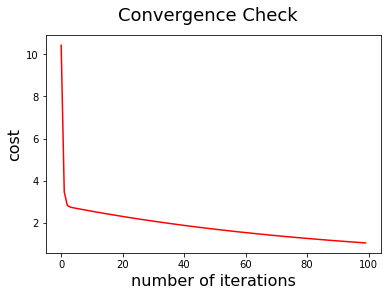

In [3]:
model.gradient_descent(X,y)
model.check_converge(X,y)       

#### compare the solutions predicted by gradient descent and normalequation

In [4]:
# calculate the gradients and check them by approximate gradients method 
model = RidgeRegression(alpha=0.01, eta=0.01, maxsteps=100000, eps=0.00000001)
beta = model.gradient_descent(X,y)[0]
print('gradient calculated by method gradient() is {}'.format(model.gradient(beta,X,y,1)))  # calculte gradient, with alpha = 1
print('gradient calculted by approximate_gradient() method is {}'.format(model.approximate_gradient(beta,X,y,alpha=1,epsilon=0.00001)))
# the gradient calculted by static method gradient() are same as the approximate_gradient method

gradient calculated by method gradient() is [9.88123092e-04 5.93303161e+00]
[1.e-05 0.e+00]
[0.e+00 1.e-05]
gradient calculted by approximate_gradient() method is [9.88123094e-04 5.93303161e+00]


In [5]:
model.compare_gd_neq(X,y) 

(None,
 array([25.83349144, 23.49225106, 10.45497247, ..., 15.73014818,
        20.20729486, 22.3367085 ]),
 array([25.81918167, 23.48066809, 10.45857382, ..., 15.72760561,
        20.19953783, 22.32647138]))

#### Effect of the regularization

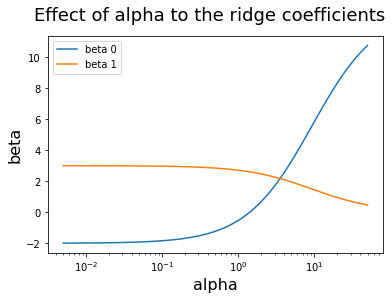

In [6]:
model.plot_beta_alpha(X,y)

YOUR ANSWER HERE

1. In the plot above of convergence check,the cost is reduced when the number of iterations increases, this means the implimentation for gradient descent successfully converged.

2. The solutions predicted by gradient descent and normalequation are almost equal to 1 decimal

3. In the upper plot 'effect of alpha to the ridge coefficients', we could see the changes of intercept beta 0 (blue line) and coefficient beta 1 (orange line) under conditions of different alpha values. When we increase the alpha value, the value of coefficient beta 1 (orange line) move more toward zero, which decreases the effect or importance of the corresponding variable (here is the x1) on the outcome. Further more, this means the model may have better generalization (Ridge uses L2 regularization) and restrict the model to avoid overfitting. 

### Aufgabe 4 (7 Punkte)

Schreibe nun eine Funktion, die einen Contour Plot der Kostenfunktion erstellt (siehe dazu gml Aufgabenblatt 1 im Trainingcenter). Zeichne den Pfad von Gradient Descent durch die Koeffizientenebene ein (dazu musst du die obige Klasse modifizieren) und untersuche und vergleiche den Plot für

- unterschiedliche Regularisierungsstärken, inkl. ohne Regularisierung.
- mit und ohne Standardisierung der Input-Daten.

Diskutiere deine Einsichten.

In [7]:
# YOUR CODE HERE

def create_contour_plot(X, y, alpha=1, betalims_0=(-10., 10.), betalims_1=(-10., 10.),resolution=.2, n = 10, ax=None):
    
    '''
    alpha: egularization proportionality factor. Larger values correspond with stronger regularization. 
    betalims_0: the range of x axis (beta 0 values are generated within the interval).
    betalims_1: the range of y axis (beta 1 values are generated within the interval).
    resolution=.2: Spacing between every two values.
    n: number of cost contour lines
    '''

    # create meshgrid
    xx1, xx2 = np.meshgrid(np.arange(betalims_0[0], betalims_0[1], resolution),
                         np.arange(betalims_1[0], betalims_1[1], resolution))
    Z = []
    model = RidgeRegression()
    #X = np.c_[np.ones(len(X)),X]
    for b0, b1 in zip(xx1.ravel(), xx2.ravel()):
        Z.append(model.costfunction(np.array([b0, b1]), X, y,alpha))
    Z = np.array(Z).reshape(xx1.shape)
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8))
    else:
        fig = None

    model.gradient_descent(X,y)
    x_pos = model.beta_step(X,y)[:,0].T #start position of beta 0 (x axis), first value represents the first iteration, second value the second iteration,...
    y_pos = model.beta_step(X,y)[:,1].T #start position of beta 1 (y axis), first value represents the first iteration, second value the second iteration,...
    x_direct = model.grad_step(X,y)[:,0].T# gradient length of beta 0 direction, first value represents the first iteration,...
    y_direct = model.grad_step(X,y)[:,0].T# gradient length of beta 1 direction, first value represents the first iteration,...
    ax.quiver(x_pos,y_pos,x_direct,y_direct, scale=10, color = 'r')     
    CS = ax.contour(xx1, xx2, Z, levels=np.linspace(Z.min(), Z.max(), n))
    plt.clabel(CS, inline=1, fontsize=10)   
    ax.set_ylabel(r'$\beta_1$')
    ax.set_xlabel(r'$\beta_0$')
    fig.suptitle('Path of gradient descent with alpha = {}'.format(alpha), fontsize=18)
    
    if fig is not None:
        return fig, ax

### with standardization of the input data

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

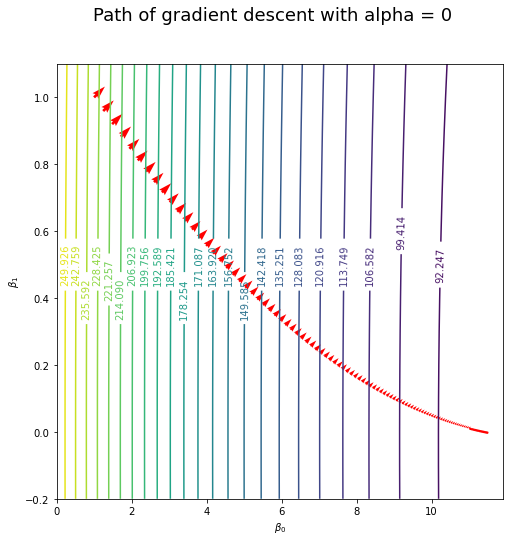

In [8]:
X = np.random.normal(loc=5, scale=3.0, size=10000)
X_st = standardization(X)
create_contour_plot(X_st,y,alpha=0,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

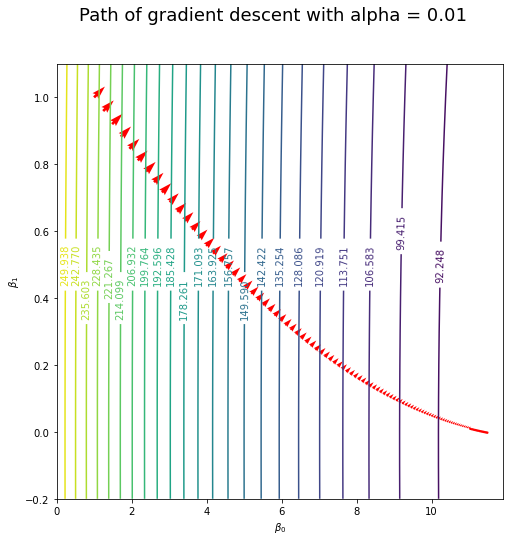

In [9]:
create_contour_plot(X_st,y,alpha=0.01,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

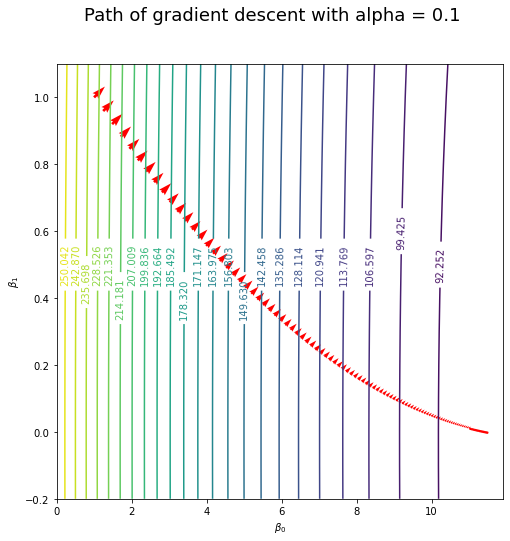

In [10]:
create_contour_plot(X_st,y,alpha=0.1,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

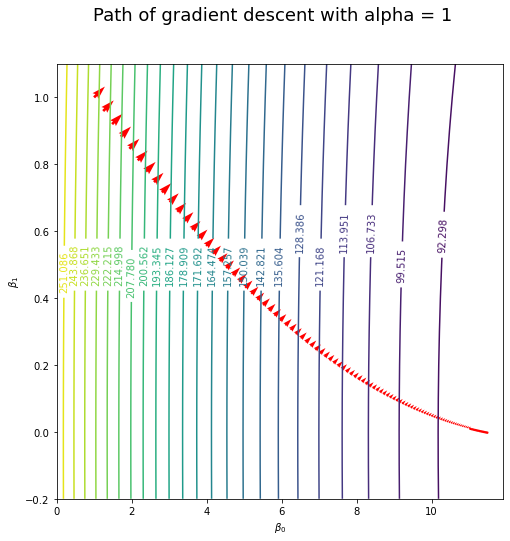

In [11]:
create_contour_plot(X_st,y,alpha=1,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

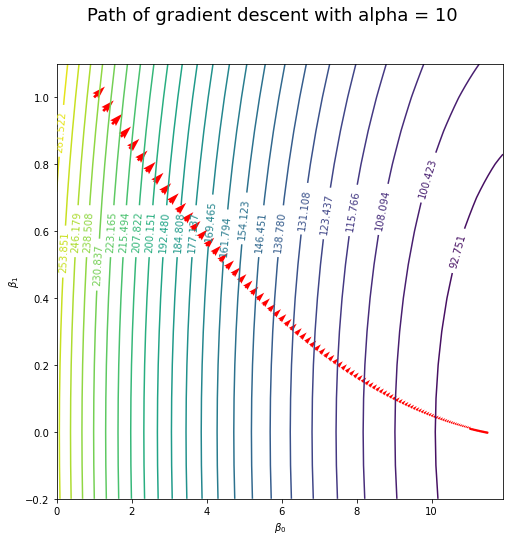

In [12]:
create_contour_plot(X_st,y,alpha=10,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

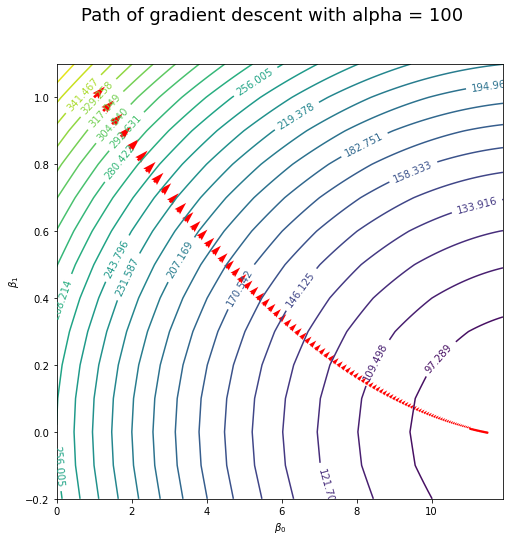

In [13]:
create_contour_plot(X_st,y,alpha=100,betalims_0=(0, 12),betalims_1=(-0.2,1.2),resolution=0.1,n=25)

### without standardization of the input data

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

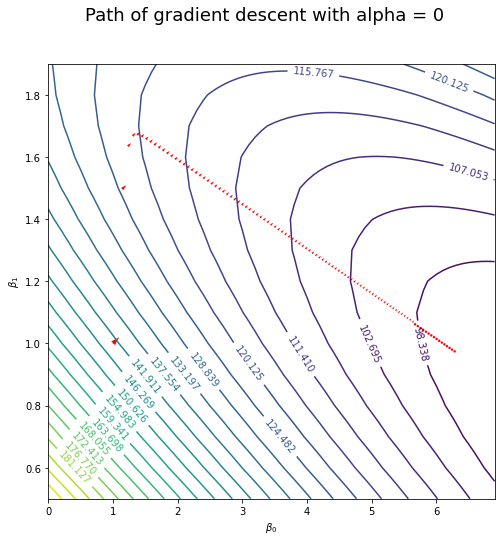

In [14]:
create_contour_plot(X,y,alpha=0,betalims_0=(0, 7), betalims_1=(0.5,2),resolution=.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

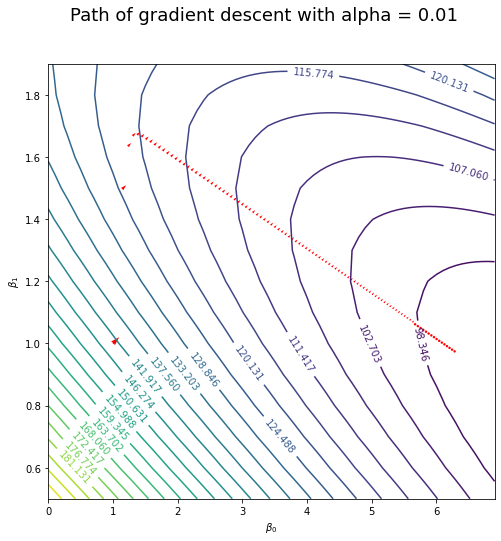

In [15]:
create_contour_plot(X,y,alpha=0.01,betalims_0=(0, 7),betalims_1=(0.5,2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

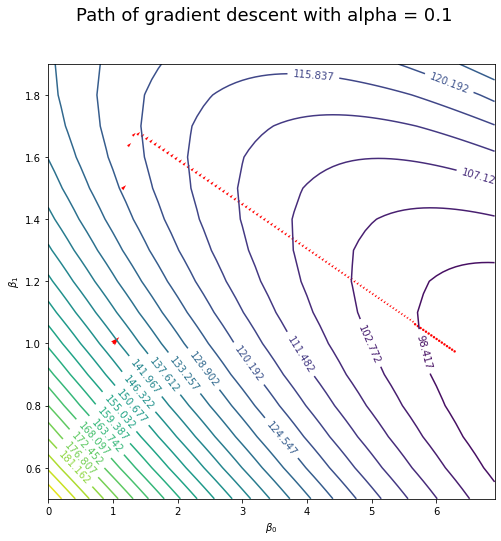

In [16]:
create_contour_plot(X,y,alpha=0.1,betalims_0=(0, 7),betalims_1=(0.5,2),resolution=0.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

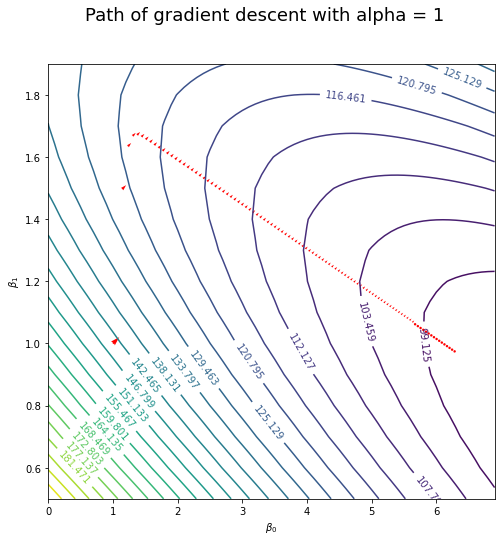

In [17]:
create_contour_plot(X,y,alpha=1,betalims_0=(0, 7), betalims_1=(0.5, 2),resolution=.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

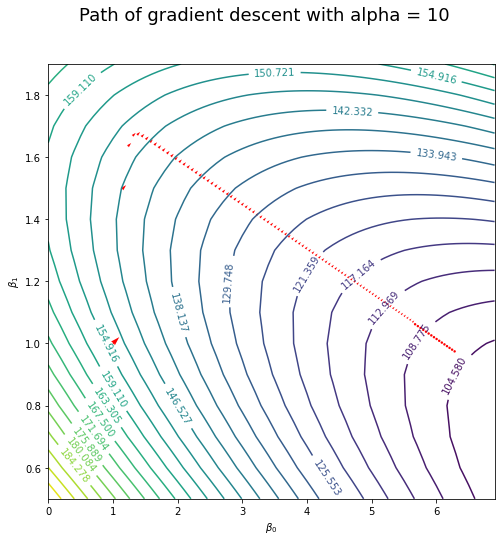

In [18]:
create_contour_plot(X,y,alpha=10,betalims_0=(0,7), betalims_1=(0.5,2),resolution=.1,n=25)

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='$\\beta_0$', ylabel='$\\beta_1$'>)

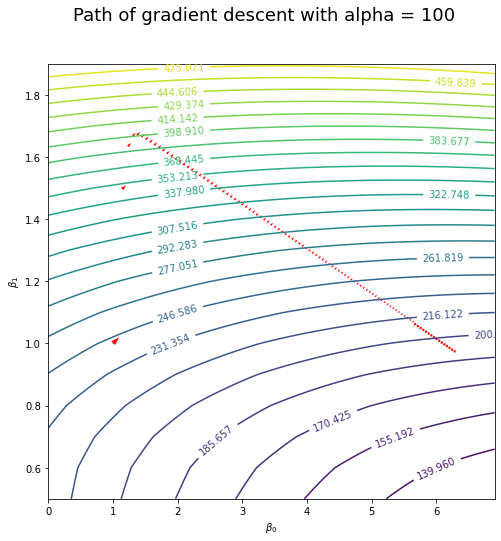

In [19]:
create_contour_plot(X,y,alpha=100,betalims_0=(0,7), betalims_1=(0.5,2),resolution=.1,n=25)

YOUR ANSWER HERE

#### With vs without standardization of input data
The groups with standardization take steps straight and quick to the lower contour line of cost. The gradient descent converge to an optimal cost. 
In the groups without standardization, the path of gradient descent bends very strong, in some cases it jumps over the lower cost even back to a even higher cost. The gradient descent algorithms will need more time to find the optimal cost.  
This means data standardization helps the optimization algorithms to reach the minimal of cost function quickly.

#### Effect of alpha
with a smaller value of alpha(weaker regularization), the optimal cost is smaller, this means the model performance on the training dataset increases.
with a larger alpha(stronger regularization), the optimal cost is larger, mode performance on the training dataset decreases

### Aufgabe 5 (4 Punkte)

Lade den Datensatz `data/moto.csv` und verschaffe dir einen Überblick durch explorative Datenanalyse. Unser Ziel wird es sein, den Preis (`price`) der Motorräder vorherzusagen unter Verwendung der übrigen Attribute. Teile deine Überlegungen zu diesem Problem.  

Unterteile den Datensatz nun noch in Trainings- und Testdaten (80:20) für die weiteren Aufgaben.

In [20]:
# YOUR CODE HERE
df = pd.read_csv('moto.csv') # load the dataframe
df.head()

,body_shape,colour,condition,displacement,fuel,has_mfk,performance,price,curb_weight,registration_age,mileage,brand
0,Strasse,schwarz,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
1,Strasse,rot,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
2,Strasse,grün,Neu,947.0,Benzin Bleifrei,True,125.0,9890,285.0,0,1.0,Kawasaki
3,Strasse,schwarz,Occasion,948.0,Benzin Bleifrei,True,125.0,11990,285.0,0,10.0,Kawasaki
4,Strasse,grau,Occasion,649.0,Benzin Bleifrei,True,48.0,10500,262.0,12,10.0,Kawasaki


In [21]:
# Overview of the data through explorative Datenanalyse
df.info()
print(df.dtypes)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   body_shape        5619 non-null   object 
 1   colour            5605 non-null   object 
 2   condition         5619 non-null   object 
 3   displacement      5619 non-null   float64
 4   fuel              5612 non-null   object 
 5   has_mfk           5619 non-null   bool   
 6   performance       5619 non-null   float64
 7   price             5619 non-null   int64  
 8   curb_weight       5619 non-null   float64
 9   registration_age  5619 non-null   int64  
 10  mileage           5619 non-null   float64
 11  brand             5619 non-null   object 
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 488.5+ KB
body_shape           object
colour               object
condition            object
displacement        float64
fuel                 object
has_mfk               

,displacement,performance,price,curb_weight,registration_age,mileage
count,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000,5619.000000
mean,830.587644,80.112146,8474.037017,294.700658,99.744616,15915.693718
std,435.660200,49.139061,6096.612631,68.714555,92.434074,18426.028558
min,0.000000,0.000000,279.000000,65.000000,0.000000,1.000000
25%,599.000000,42.000000,4490.000000,262.000000,21.000000,1500.000000
50%,847.000000,75.000000,6900.000000,287.000000,77.000000,10229.000000
75%,1079.000000,115.000000,10990.000000,322.000000,152.000000,24151.000000
max,2294.000000,214.000000,89900.000000,660.000000,994.000000,171719.000000


In [22]:
df.isnull().sum()  # find the null value
# 14 NA in attribute colour, 7 NA in attribute fuel

body_shape           0
colour              14
condition            0
displacement         0
fuel                 7
has_mfk              0
performance          0
price                0
curb_weight          0
registration_age     0
mileage              0
brand                0
dtype: int64

In [23]:
df_1 = df.dropna() # drop the samples with NA
df_train = df_1.sample(frac=0.8, random_state=1)  # split the data into training and test data: 80% to 20%
df_test=df_1.drop(df_train.index)

YOUR ANSWER HERE

The dataset 'moto' has 5619 data points (samples) 12 variables (including 'price'), in which 6 are numerical variables,5 categorical variables, 1 ordinal variable.To predict the price using the remaining 11 attrbutes, we could use linear models (simple linear regression, ridge regression, or lasso regression). 

1. Inspect and prepare the data: 

    The NA data should be deleted or imputed. 
    The non-numerical variables should be encoded numerically, as majority of machine learning algorithms can only take numbers as input. The ordinal variable could use ordinal encoding, which simply assign a number to each possible value, the relative relationship between values are still intact. For the categorical variables, the dummy encoding would be a better option, as it avoids imposing a numerical ordering on the categories, though it turns one feature into many. Check again the numerical variables, make sure that they are not secretly categorical.

2. split the dataset into training data and test data two parts.

3. Linear model: The goal is to find out the intercept Beta 0 and the weights/coefficients beta 1, beta 2,...corresponding to each variables. I will use the training data as input X,the price in training data as the true value y. In the input X, each row is a sample, each column (except the first column, which are all 1) is a variable. As in Aufgabe 3, implement the gradient descent method to find out the coefficients Beta where the cost functions is minimal. Alternatively, could also use the normal equation (also as in Aufgabe 3) to find out the optimal coefficients Beta.

4. predict: with the Beta, we could predict the 'price' of the training data. 

5. score: get the R^2 score given the true price, predicted price and the mean of the true price. R^2 value is between 0 and 1. The higher the R^2 value is, the better the model is.

6. test the model: predict the test dataset with the model, and calculate the corresponding score.

7. evaluate the model: compare the score between the training and test dataset. If the training set score is much larger than the test set, then the model is likely to be overfitting.If the training set score and test set score are very close and both are not very good, then it is likely underfitting. The simple linear regression (aka ordinary least squares) has no way to control model complexicity. However both the Ridge regression and Lasso regression have a regularization parameter alpha, that controls how strongly coefficients are pushed to zero. For the case of overfitting, could try to increase the alpha,that will push the coefficients move more toward zero to decrease the training set performance. For underfitting model, could decrease the alpha to improve the training set performance.     

### Aufgabe 6 (3 Punkte)

Erstelle ein erstes einfaches lineares Modell für `price`, bloss mit der einen Input-Variablen `displacement`.  

Untersuche für die unregularisierte OLS-Lösung die Modell-Annahmen eines linearen Modells. Schau dir dazu *Kapitel 4 - Residuenanalyse* im Skript von Werner Stahel an, wenn du Anleitung möchtest.    

Nimm, falls sinnvoll, Variablen-Transformationen vor, um dein Modell zu verbessern und untersuche den Effekt. Erkläre dein Vorgehen.

### To investigate the model assumptions of the linear model, I will analyse the residuals from three aspects. 

1.	the residuals should scatter evenly around r=0 (Erwartungswert = 0), this mean there should no systematic error in the model.
2.	The residual/error should be independent to each other.
3.	The residual/error should be normal distributed, which could be proved in histogram.


In [24]:
# YOUR CODE HERE
# Create a simple linear model for price, only with the input variable 'displacement'.
# Variable transformation by min-max-scaling

X_train = np.array(df_train['displacement'])
X_train = X_train.reshape(X_train.shape[0],1)
y_train = np.array(df_train['price']).reshape(X_train.shape[0],1)
X_min = np.min(X_train)
X_max = np.max(X_train)
X_min_max = np.zeros(len(X_train)).reshape(len(X_train),1)
for i in range(X_min_max.shape[0]):
    X_min_max[i][0] = (X_train[i][0] - X_min)/(X_max - X_min)    # scale the input data between 0 and 1
X_min_max

array([[0.30209241],
       [0.41543156],
       [0.43548387],
       ...,
       [0.32650392],
       [0.54533566],
       [0.50741064]])

In [25]:
# use method gradient descent to find the parameter
def gd_OLS(X,y,iterations,lr):
    N = X.shape[0] # number of samples
    beta_0 = 1 # initial the intercept beta 0 value as 1
    beta_1 = 1 # initial the coefficient beta 1 value as 1
    for i in range(iterations):
        grad_beta_0 = -2/N * np.sum(y - beta_1 * X - beta_0)
        grad_beta_1 = -2/N * np.sum(X * (y - beta_1*X - beta_0))
        beta_0 = beta_0 - lr * grad_beta_0       
        beta_1 = beta_1 - lr * grad_beta_1
    return beta_0,beta_1,beta_1*X+beta_0 # return the intercept, coefficient, and predicted price
gd_OLS(X_min_max,y_train,iterations = 100,lr=0.01)

(6452.935353564989,
 3534.195713737234,
 array([[7520.5890718 ],
        [7921.15179436],
        [7992.02058374],
        ...,
        [7606.86411973],
        [8380.25829946],
        [8246.22384999]]))

In [26]:
# use method normal equation of linear regression
def normalequation(X,y):
    X = np.c_[np.ones(len(X)),X] # insert a column with value 1
    L = np.eye(X.shape[1])  # generate the L matrix
    L[0][0] = 0 # set the L[0][0] as 0
    beta_neq = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)@y # betas: intercept and coefficients
    return beta_neq,X@beta_neq
normalequation(X_min_max,y_train) # return the intercept, coefficient, and predicted price

(array([[ 1559.03769439],
        [18860.77558755]]),
 array([[ 7256.73494032],
        [ 9394.39913071],
        [ 9772.60125671],
        ...,
        [ 7717.15491979],
        [11844.49116432],
        [11129.19583907]]))

In [27]:
gd_result = gd_OLS(X_min_max, y_train,1000,0.01)
y_pred = gd_result[2]
print('linear model is y = {:.3f} x + {:.3f}'.format(gd_result[1],gd_result[0]))
Residual_train = y_train - y_pred
mean_Residual = np.mean(Residual_train)
mean_Residual

linear model is y = 10294.735 x + 4778.783


-100.67101021045961

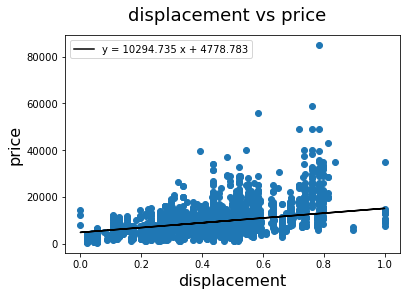

In [28]:
plt.scatter(X_min_max,y_train)
plt.plot(X_min_max,y_pred,'k',label='y = 10294.735 x + 4778.783')
plt.xlabel('displacement',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.suptitle('displacement vs price',fontsize=18)
plt.legend()
plt.show()

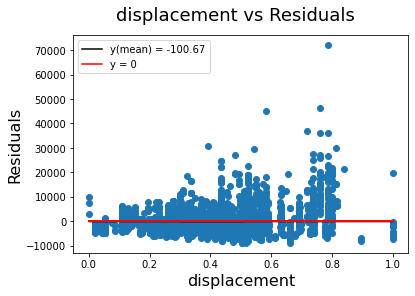

In [29]:
plt.scatter(X_min_max,Residual_train)
plt.plot(X_min_max,np.array([mean_Residual]*(X_min_max.shape[0])),'k',label='y(mean) = -100.67')
plt.plot(X_min_max,np.zeros(X_min_max.shape[0]),'r',label='y = 0')
plt.xlabel('displacement',fontsize=16)
plt.ylabel('Residuals',fontsize=16)
plt.suptitle('displacement vs Residuals',fontsize=18)
plt.legend()
plt.show()

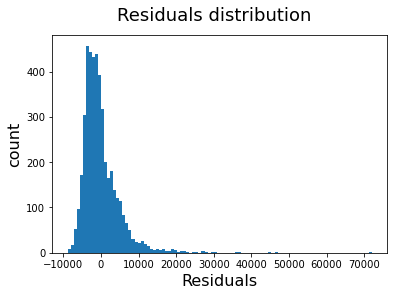

In [30]:
plt.hist(Residual_train, bins=100) 
plt.xlabel('Residuals',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.suptitle('Residuals distribution',fontsize=18)
plt.show()

linear model is y = 1908.312 x + -3821.075
the mean of the Residual is -173.02848774401053


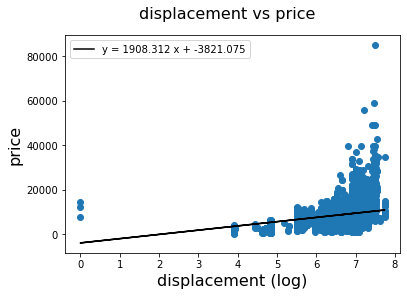

In [31]:
# log(e) transformation
X_train_log = np.array([np.log(x+1) for x in X_train])
y_pred_log = gd_OLS(X_train_log, y_train,1000,0.01)[2]
print('linear model is y = {:.3f} x + {:.3f}'.format(gd_OLS(X_train_log, y_train,1000,0.01)[1],gd_OLS(X_train_log, y_train,1000,0.01)[0]))
Residual_log = y_train - y_pred_log
print('the mean of the Residual is {}'.format(np.mean(Residual_log)))

plt.scatter(X_train_log,y_train)
plt.plot(X_train_log,y_pred_log,'k',label='y = 1908.312 x + -3821.075')
plt.xlabel('displacement (log)',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.suptitle('displacement vs price',fontsize=16)
plt.legend()
plt.show()

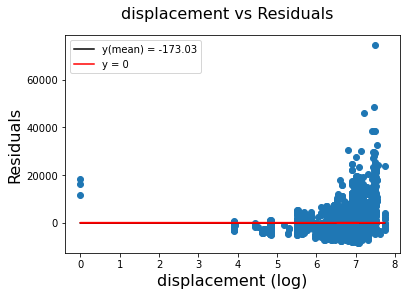

In [32]:
plt.scatter(X_train_log,Residual_log)
plt.plot(X_train_log,np.array([np.mean(Residual_log)]*(X_train_log.shape[0])),'k',label='y(mean) = -173.03')
plt.plot(X_train_log,np.zeros(X_train_log.shape[0]),'r',label='y = 0')
plt.xlabel('displacement (log)',fontsize=16)
plt.ylabel('Residuals',fontsize=16)
plt.suptitle('displacement vs Residuals',fontsize=16)
plt.legend()
plt.show()

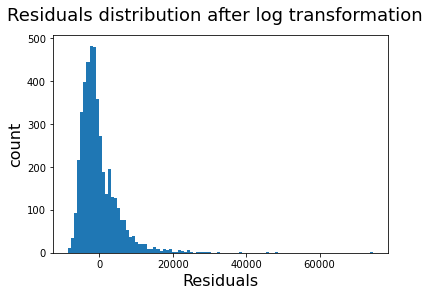

In [33]:
plt.hist(Residual_log, bins=100) 
plt.xlabel('Residuals',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.suptitle('Residuals distribution after log transformation',fontsize=18)

plt.show()

linear model is y = 1362.616 x + -3752.399
After cubic root transformation, the mean of the Residual is -117.19909042759318


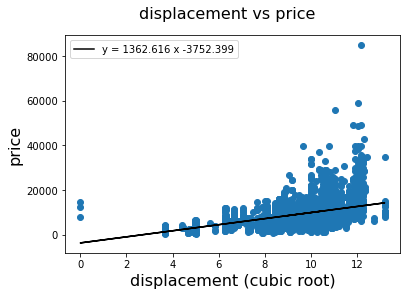

In [34]:
# cubic root
X_train_cbrt = np.array([np.cbrt(x) for x in X_train])
y_pred_cbrt = gd_OLS(X_train_cbrt, y_train,1000,0.01)[2]
print('linear model is y = {:.3f} x + {:.3f}'.format(gd_OLS(X_train_cbrt, y_train,1000,0.01)[1],gd_OLS(X_train_cbrt, y_train,1000,0.01)[0]))
Residual_cbrt = y_train - y_pred_cbrt
print('After cubic root transformation, the mean of the Residual is {}'.format(np.mean(Residual_cbrt)))
plt.scatter(X_train_cbrt,y_train)
plt.plot(X_train_cbrt,y_pred_cbrt,'k',label='y = 1362.616 x -3752.399')
plt.xlabel('displacement (cubic root)',fontsize=16)
plt.ylabel('price',fontsize=16)
plt.suptitle('displacement vs price',fontsize=16)
plt.legend()
plt.show()

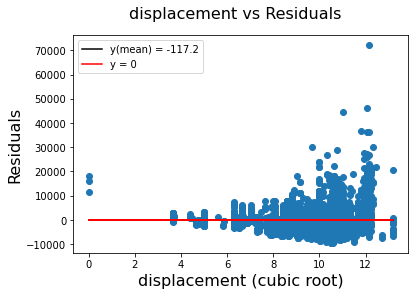

In [35]:
plt.scatter(X_train_cbrt,Residual_cbrt)
plt.plot(X_train_cbrt,np.array([np.mean(Residual_cbrt)]*(X_train_cbrt.shape[0])),'k',label='y(mean) = -117.2')
plt.plot(X_train_cbrt,np.zeros(X_train_cbrt.shape[0]),'r',label='y = 0')
plt.xlabel('displacement (cubic root)',fontsize=16)
plt.ylabel('Residuals',fontsize=16)
plt.suptitle('displacement vs Residuals',fontsize=16)
plt.legend()
plt.show()

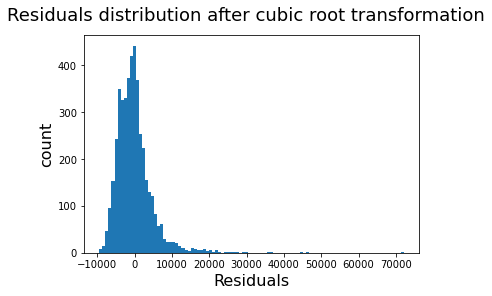

In [36]:
plt.hist(Residual_cbrt, bins=100) 
plt.xlabel('Residuals',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.suptitle('Residuals distribution after cubic root transformation',fontsize=18)
plt.show()

YOUR ANSWER HERE

Analysis of the variable transformation 

With min-max-scaling:

From the upper two scatter plots, we could see that the mean of the residuals is 686.93, in this case is very close to zero. The residuals scatter around zero, but with some extreme values.The residuals are independent to each other within the range of scaled displacement < 0.6. When the displacement larger than 0.6, the residuals show some weak dependence to each other.

The histogram of residuals shows a tendency of right skewed normal distribution.



With log transformation and cubic root transformation:

In both cases,the mean value of residuals are very close to zero, and they scatter around zero with some extreme values, which are quite similiar to the data only with min-max-scaling.

The residuals are independent to each other within a certain range. The extreme values show some dependence to each other.

The histogram of residuals with log transformation shows a tendency of right skewed normal distribution.

The histogram with cubic root transformation shows a slightly left skewed normal distribution.

Overall, all three transformations work good on the model.

### Aufgabe 7 (4 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell im Sinne von $R^2$ auf dem Trainingsdatensatz. Du darfst durch Feature-Transformation beliebige weitere Attribute hinzufügen. Gebe $R^2$ und MAE auf dem Testdatensatz an.

Zur Optimierung der Hyperparameter kannst du scikit-learn-Funktionalität verwenden.

In [37]:
# YOUR CODE HERE
####### ridge regression on the training dataset

# data transformation: coding the non-numerical variables to dummies
# categorical variables to dummies
features = ["body_shape","fuel","colour","condition","has_mfk","brand"]
df_1 = df.dropna() # drop na
for i in range(len(features)): 
    new_dummies = pd.get_dummies(df_1[features[i]])
    df_1 = pd.concat([df_1, new_dummies], axis=1)   
# boolean variable to 1/0
df_1['has_mfk_new'] = df_1['has_mfk'].replace([True,False],[1,0])
df_2 = df_1.drop(["body_shape","fuel","colour","condition","has_mfk","brand","has_mfk"],axis=1) # drop the old variables
print('shape of new dataframe {}'.format(df_2.shape))
df_2.head()

shape of new dataframe (5598, 74)


,displacement,performance,price,curb_weight,registration_age,mileage,ATVQuad,Chopper,Enduro,Scooter,...,Ducati,Harley-davidson,Honda,Husqvarna,Kawasaki,Ktm,Suzuki,Triumph,Yamaha,has_mfk_new
0,947.0,125.0,9890,285.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,947.0,125.0,9890,285.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,947.0,125.0,9890,285.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,948.0,125.0,11990,285.0,0,10.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,649.0,48.0,10500,262.0,12,10.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
# split the new dataframe into train and test parts
df2_train = df_2.sample(frac=0.8, random_state=1)  # split the data into training and test data: 80% to 20%
df2_test=df_2.drop(df2_train.index)
df2_test

,displacement,performance,price,curb_weight,registration_age,mileage,ATVQuad,Chopper,Enduro,Scooter,...,Ducati,Harley-davidson,Honda,Husqvarna,Kawasaki,Ktm,Suzuki,Triumph,Yamaha,has_mfk_new
2,947.0,125.0,9890,285.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14,1199.0,178.0,4490,318.0,208,20400.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,497.0,34.0,4400,274.0,199,43900.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18,649.0,72.0,3999,279.0,164,12294.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20,649.0,72.0,3050,277.0,163,15390.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5596,997.0,200.0,29500,313.0,12,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5599,997.0,200.0,27900,313.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5602,997.0,200.0,24900,313.0,0,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5610,997.0,188.0,6500,283.0,104,9944.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
# split the input data and output data
input_train = df2_train.drop("price",axis=1)
price_train = np.array(df2_train["price"])
input_test = df2_test.drop("price",axis=1)
price_test = np.array(df2_test["price"])

In [40]:
# min-max-scaling of the first 5 variables, as the values of other variables are already betwoeen 0 and 1
# for the training input data
c = input_train.copy()     
for j in range(5):
    min_j = np.min([np.min(input_train.iloc[:,j]),np.min(input_test.iloc[:,j])])
    max_j = np.max([np.max(input_train.iloc[:,j]),np.max(input_test.iloc[:,j])])
    for i in range(c.shape[0]): 
        c.iloc[i,j] = (c.iloc[i,j] - min_j)/ (max_j - min_j)
# for the test input data
d = input_test.copy()    
for j in range(5):
    min_j = np.min([np.min(input_train.iloc[:,j]),np.min(input_test.iloc[:,j])])
    max_j = np.max([np.max(input_train.iloc[:,j]),np.max(input_test.iloc[:,j])])
    for i in range(d.shape[0]): 
        d.iloc[i,j] = (d.iloc[i,j] - min_j) / (max_j - min_j)
input_train = c
input_test = d
input_train.head()

,displacement,performance,curb_weight,registration_age,mileage,ATVQuad,Chopper,Enduro,Scooter,Seitenwagen,...,Ducati,Harley-davidson,Honda,Husqvarna,Kawasaki,Ktm,Suzuki,Triumph,Yamaha,has_mfk_new
987,0.302092,0.350467,0.289076,0.021127,0.025035,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
325,0.415432,0.584112,0.400000,0.129779,0.140643,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1238,0.435484,0.771028,0.363025,0.021127,0.006295,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3017,0.631648,0.317757,0.504202,0.247485,0.080941,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
927,0.435920,0.584112,0.351261,0.093561,0.181687,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
model = RidgeRegression(alpha=1,eta = 0.01,maxsteps = 10)
beta = model.gradient_descent(input_train,price_train)[0]
model.predict(input_train,beta)
X_scaled = min_max_scaling(X.reshape(len(X),1))

In [42]:
# Develop the best ridge regression model in terms of 𝑅2 on the training dataset. 
# Specify 𝑅2 and MAE on the test data set.

from sklearn.model_selection import ParameterGrid

def best_Ridge(param_grid,input_train,price_train,input_test,price_test):

    '''
    alpha: regularization strength
    cor_alpha: the alpha value corresponding of the max R2 score on the train dataset
    cor_eta: the learning rate corresponding of the max R2 score
    cor_test_R2: the R^2 score on the test dataset corresponding of the max R2 score on the train dataset
    cor_beta: the betas corresponding of the max R2 score
    R2_test: the R^2 score on the test dataset corresponding of the model based on the train dataset
    MAE_test: the MAE on the test dataset corresponding of the model based on the train dataset
    '''
    max_R2_train = 0 # initial max R2 score on the training dataset as 0
    input_test_ =  np.c_[np.ones(len(input_test)),input_test] # insert a column with values 1 in the test input data 
    R2_train_ls = []
    R2_test_ls = []
    for i in range(len(param_grid)):
        beta = 0
        model = RidgeRegression(alpha=param_grid[i]['alpha'],eta = param_grid[i]['eta'], maxsteps=1000, eps=0.00000001)
        beta = model.gradient_descent(input_train,price_train)[0]
        R2_train = model.score(input_train,price_train,beta)
        R2_train_ls.append(R2_train)
        
        # predict the test dataset based on the model of training dataset
        price_pred_test = np.dot(input_test_,beta)
        price_mean_test = np.array([[np.mean(price_test)]])*(price_test.shape[0])# mean value as a np array with same shape as input_test
        R2_test = 1 - np.sum((price_test - price_pred_test)**2)/np.sum((price_test - price_mean_test)**2)
        R2_test_ls.append(R2_test)
        MAE_test = 1/len(price_test) * np.sum(abs(price_test - price_pred_test))
        if R2_train > max_R2_train:
            max_R2_train = R2_train
            cor_alpha = param_grid[i]['alpha']
            cor_eta = param_grid[i]['eta'] 
            cor_test_R2 = R2_test
            cor_test_MAE = MAE_test
            cor_beta = beta
    return cor_alpha,cor_eta,max_R2_train,cor_test_R2,cor_test_MAE,R2_train_ls,R2_test_ls,beta

In [43]:
param_grid = list(ParameterGrid({'alpha':[0.01,0.1,1],'eta':[0.0001,0.001,0.01,0.1]}))
fit = best_Ridge(param_grid,input_train,price_train,input_test,price_test)
print("The best Ridge model in terms of R^2 on the training dataset: when the alpha = {},learning rate = {}, the largest R^2 value is {}".format(fit[0],fit[1],fit[2])) 
print("With the best Ridge model, the corresponding R^2 score of test dataset is {}, the MAE is {}".format(fit[3],fit[4]))

The best Ridge model in terms of R^2 on the training dataset: when the alpha = 0.01,learning rate = 0.1, the largest R^2 value is 0.9999106639668569
With the best Ridge model, the corresponding R^2 score of test dataset is 0.9999997556448008, the MAE is 2540.4770512675873


YOUR ANSWER HERE

The best Ridge model in terms of R^2 on the training dataset: when the alpha = 0.01,learning rate = 0.1, the largest R^2 value is 0.9998991226038382

The corresponding R^2 score of test dataset is 0.9999997264713547, the MAE is 2749.1165920279705

### Aufgabe 8 (4 Punkte)

Erstelle einen Plot bei welchem du auf der x-Achse die Regularisierungsstärke $\alpha$ und auf der y-Achse $R^2$ für Trainings- und Testdaten (zwei Kurven) zeichnest. Diskutiere den Plot hinsichtlich Bias-Variance Trade-Off und der Verallgemeinerungsfähigkeit des Modells.  

Was ziehst du daraus für Schlüsse für weitere Modellierungsschritte?

In [44]:
# YOUR CODE HERE
param_grid = list(ParameterGrid({'alpha':list(10**np.linspace(-3,2,51)),'eta':[0.01]}))
gd_fit = best_Ridge(param_grid,input_train,price_train,input_test,price_test)
R2_train_ls = gd_fit[5] # list of training dataset R2 score 
R2_test_ls = gd_fit[6] # list of test dataset R2 score

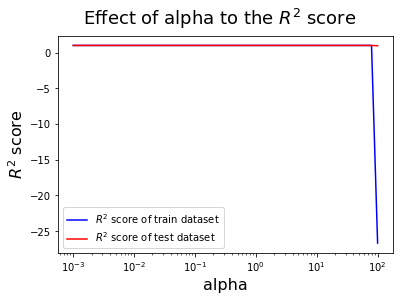

In [45]:
alphas = list(10**np.linspace(-3,2,51))
plt.semilogx(alphas,R2_train_ls,'b',label= '$R^2$ score of train dataset')
plt.semilogx(alphas,R2_test_ls,'r',label= '$R^2$ score of test dataset')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('$R^2$ score',fontsize=16)
plt.suptitle('Effect of alpha to the $R^2$ score',fontsize=18)
plt.legend(loc='lower left')
plt.show()

YOUR ANSWER HERE

The increase of alpha, will restrict the performance on training dataset to avoid over fitting. This will enhance the generalization of the model, which means a higher possibility of performing also good on test dataset. That is why we could see from the plot, that the performance of training dataset but not the test dataset is decreased by the increase of regularization factor alpha.

### Aufgabe 9 (10 Punkte)

Was ist das beste Modell für die Output-Variable `price` im Sinne von $R^2$, das du ohne Einschränkungen finden kannst?

Vergleiche dazu mindestens drei weitere Ansätze miteinander.

Wie verändert sich die Situation wenn du für den *Mean Absolute Error* (MAE) optimierst?

Hierzu kannst du scikit-learn Funktionalität verwenden.

#### the best Ridge linear model for the output variable price in terms of 𝑅2 
#### by gradient descent

In [46]:
# YOUR CODE HERE
param_grid = list(ParameterGrid({'alpha':[0.001],'eta':[0.01]}))
best_model = best_Ridge(param_grid,input_train,price_train,input_test,price_test)
beta = best_model[7]
beta    # the beta corresponding of the best model

array([ 1.95465712e+03,  5.81213327e+03,  4.64993773e+03,  3.06666802e+03,
       -9.90752155e+02, -1.71616241e+03,  5.49218667e+02,  5.54883926e+02,
        4.67838567e+02, -1.47133025e+03,  9.60532176e+01,  5.01419955e+02,
       -3.31949636e+02, -1.33768097e+02,  1.17598475e+03,  3.81638503e+02,
        6.23532584e+00,  1.06641887e+03,  8.12338351e+02, -1.22012687e+02,
       -1.38697808e+01,  3.94807099e+01, -2.07414810e+02,  4.62381898e+01,
        7.56129636e+00, -8.06806526e+01,  2.77355808e+01, -2.13085260e+02,
        1.82448595e+02, -1.16522801e+02,  6.18596424e+01,  1.34485318e+02,
       -1.61269027e+01, -4.93320130e+01, -1.70107130e+01, -1.42451303e+01,
       -3.19673259e+00,  2.43762574e+02, -8.11752510e+01,  2.75460020e+01,
       -2.91988000e+01,  7.27123852e+02,  2.88713954e+01,  7.72449346e+01,
        1.70436513e+01,  4.79482924e+02,  1.23109284e+01,  3.31952839e+02,
       -9.79043104e+01, -1.44316163e+02, -5.25007915e+00, -4.98912271e+01,
        9.80198477e-01,  

In [47]:
variable_names = input_train.columns # all the variables names
variable_names

Index([        'displacement',          'performance',          'curb_weight',
           'registration_age',              'mileage',              'ATVQuad',
                    'Chopper',               'Enduro',              'Scooter',
                'Seitenwagen',             'Sonstige',              'Strasse',
             'SupermotoTrial',              'Touring',                'Trike',
             '2-Takt-Gemisch',               'Andere',               'Benzin',
            'Benzin Bleifrei',      'Benzin verbleit', 'Elektrisch (Plug-in)',
                  'Sonstiges',            'anthrazit',      'anthrazit matt.',
                      'beige',          'beige matt.',                 'blau',
                 'blau matt.',             'bordeaux',       'bordeaux matt.',
                      'braun',          'braun matt.',                 'gelb',
                 'gelb matt.',                 'gold',           'gold matt.',
                       'grau',           'grau matt.

#### The best Ridge linear regression model:

In [48]:
print("the best ridge linear model is: price = variable_names * beta[1:] + beta[0]")
print("the best R^2 is: {}, the best alpha is: {}".format(best_model[2],best_model[0]))

the best ridge linear model is: price = variable_names * beta[1:] + beta[0]
the best R^2 is: 0.9999004843429216, the best alpha is: 0.001


#### by normal equation 

In [49]:
alphas = list(10**np.linspace(-3,2,51))
input_train_one = np.c_[np.ones(len(input_train)),input_train]
best_R2_neq = 0
for i in range(len(alphas)):
    alpha = alphas[i] 
    L = np.eye(input_train_one.shape[1])
    L[0][0] = 0
    beta_neq = (np.dot(np.linalg.inv(np.dot(input_train_one.T,input_train_one)+ alpha*L),input_train_one.T)@price_train).T
    y_pred = input_train_one@beta_neq
    R2 = 1 - np.sum((price_train - y_pred)**2)/np.sum((price_train - np.mean(price_train))**2)
    if R2 > best_R2_neq:
        best_R2_neq = R2
        best_alpha_neq = alpha
best_R2_neq,best_alpha_neq  

(0.638844577999488, 0.001)

#### HuberRegressor: robust to outliers

In [50]:
from sklearn.linear_model import HuberRegressor,SGDRegressor
best_R2_hb = 0
for i in range(len(alphas)):
    huber = HuberRegressor( alpha=alphas[i], max_iter=1000, tol=0.00000001).fit(input_train, price_train)
    R2_hb = huber.score(input_train, price_train)
    if R2_hb > best_R2_hb:
        best_R2_hb = R2_hb
        best_alpha = alphas[i]
best_R2_hb,best_alpha    

(0.6128773648725362, 0.001)

#### Stochastic Gradient Descent

In [51]:
best_R2_sgd = 0
for i in range(len(alphas)):
    SGD = SGDRegressor( alpha=alphas[i], max_iter=1000, tol=0.00000001).fit(input_train, price_train)
    R2_sgd = SGD.score(input_train, price_train)
    if R2_sgd > best_R2_sgd:
        best_R2_sgd = R2_sgd
        best_alpha = alphas[i]
best_R2_sgd,best_alpha    

(0.6306209448441313, 0.001)

## optimize for mean absolute error (MAE)

#### Ridge regression model by gradient descent

In [52]:
best_mae_gd = 500000
best_alpha_gd = 0.5
for i in range(len(alphas)):
    model = RidgeRegression(alpha=alphas[i])
    beta = model.gradient_descent(input_train,price_train)[0]
    y_pred = input_train@beta[1:] + beta[0]
    mae_gd = model.MAE(price_train,y_pred)
    if mae_gd < best_mae_gd:
        best_mae_gd = mae_gd
        best_alpha_gd = alphas[i]
best_mae_gd,best_alpha_gd

(3326.174734988492, 0.001)

#### by normal equation

In [53]:
alphas = list(10**np.linspace(-3,2,51))
input_train_one = np.c_[np.ones(len(input_train)),input_train]
best_mae_neq = 500000
best_alpha_neq = 0.5
for i in range(len(alphas)):
    alpha = alphas[i] 
    L = np.eye(input_train_one.shape[1])
    L[0][0] = 0
    beta_neq = (np.dot(np.linalg.inv(np.dot(input_train_one.T,input_train_one)+ alpha*L),input_train_one.T)@price_train).T
    y_pred = input_train_one@beta_neq
    mae_neq = model.MAE(price_train,y_pred)
    if mae_neq < best_mae_neq:
        best_mae_neq = mae_neq
        best_alpha_neq = alpha
best_mae_neq,best_alpha_neq

(2200.5605556935225, 0.001)

#### HuberRegressor: robust to outliers

In [55]:
best_mae_hb = 100000
N = input_train.shape[0]
for i in range(len(alphas)):
    huber = HuberRegressor( alpha=alphas[i], max_iter=1000, tol=0.00000001).fit(input_train, price_train)
    y_pred = huber.predict(input_train)
    mae_hb = 1/N * np.sum(abs(price_train - y_pred))
    if mae_hb < best_mae_hb:
        best_mae_hb = mae_hb
        best_alpha = alphas[i]
        
best_mae_hb,best_alpha 

(2100.996748102956, 0.001)

#### Stochastic Gradient Descent

In [56]:
best_mae_sgd = 100000
for i in range(len(alphas)):
    SGD = SGDRegressor( alpha=alphas[i], max_iter=1000, tol=0.00000001).fit(input_train, price_train)
    y_pred = SGD.predict(input_train)
    mae_sgd = 1/N * np.sum(abs(price_train - y_pred))
    if mae_sgd < best_mae_sgd:
        best_mae_sgd = mae_sgd
        best_alpha = alphas[i]        
best_mae_sgd,best_alpha

(2223.2037140528046, 0.001584893192461114)

YOUR ANSWER HERE

In my gradient descent for Ridge regression model together with other three methods normal equation, HuberRegressor, SGDRegressor, I have tested 51 alpha values in the range of [0.001, 100] to find the models with the best R^2 score or MAE score.

In all four methods, alpha = 0.001 appeared to be the best parameter regardless using R^2 or MAE score.
Performance(optimization for R^2): the Ridge model by gradient descent > normal equation > stochastic gradient descent > Huber regressor

Performance(optimization for MAE): Huber regressor > normal equation > stochastic gradient descent > gradient descent

### Aufgabe 10 (4 Punkte)

Stelle nun die Resultate der bisherigen Aufgaben und Modelle tabellarisch und graphisch übersichtlich dar und diskutiere sie.

In [57]:
# YOUR CODE HERE
df = pd.DataFrame([[0.999, 0.639, 0.632, 0.613],[3326.175, 2200.560, 2224.607, 2101.014]],
                  index=pd.Index(['$R^2$', 'MAE']),
                  columns=pd.Index(['Gradient descent', 'Normal equation', 'Stochastic Gradient Descent','HuberRegressor']))
df

,Gradient descent,Normal equation,Stochastic Gradient Descent,HuberRegressor
$R^2$,0.999,0.639,0.632,0.613
MAE,3326.175,2200.560,2224.607,2101.014


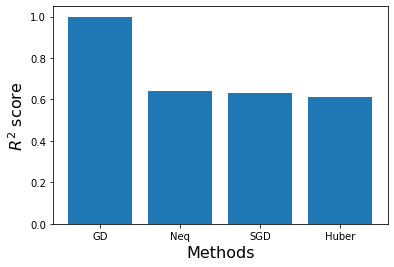

In [58]:
x = ['GD', 'Neq', 'SGD','Huber']
y_r2 = [0.999, 0.639, 0.632, 0.613]
y_mae = [3326.175, 2200.560, 2224.607, 2101.014]
plt.bar(x,y_r2)
plt.xlabel('Methods',fontsize = 16)
plt.ylabel('$R^2$ score',fontsize=16)
plt.show()

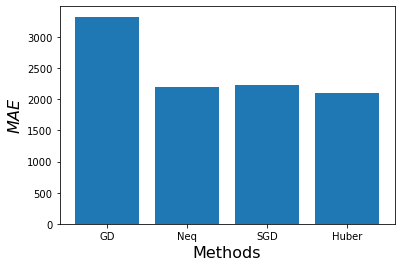

In [59]:
plt.bar(x,y_mae)
plt.xlabel('Methods',fontsize = 16)
plt.ylabel('$MAE$',fontsize=16)
plt.show()

YOUR ANSWER HERE

Both gradient descent (GD) and stochastic gradient descent (SGD) update a set of parameters in an iterative manner to minimize an error function. SGD often converges faster than GD, but the cost is not that well minimized as GD. 

The normal equation is analytical approach. It performs optimization without iteration and works well with small number of features. 

HuberRegressor is robust to outliers. The cost function won't be heavily influenced by the outliers, while not completely ignoring their effect.

From the table and bar plots we could see that, the performance of Normal equation, stochastic gradient descent and huber regressor are very close on the optimizations of R2 score and MAE score. With the gradient descent optimization, the R2 score is better than other three groups, but the MAE score is worse than other three groups.

This tells us that, depending on the user cases, it is necessary to select an appropriate scoring type for each optimization method, as the performance could vary a lot.  




### Aufgabe 11 (8 Punkte)

Nun betrachten wir noch dein bestes Modell etwas vertieft. Trainiere diesen Modell-Ansatz auf jeweils $[\frac{1}{10}, \frac{2}{10}, \frac{3}{10}, .., \frac{10}{10}]$ der Trainingsdaten. Erstelle nun einen Plot bei welchem der Wert der Kostenfunktion für die Trainings- und Testdaten auf der y-Achse und der Trainingsdatenanteil auf der x-Achse liegen möge. Zeichne also zwei Kurven in dieses Koordinatensystem.

Schau dir dazu das Video von [Kilian Weinberger zu Model Selection](https://www.youtube.com/watch?v=a7cofmFgwIk&list=PLl8OlHZGYOQ7bkVbuRthEsaLr7bONzbXS&index=22) an.  

Interpretiere und diskutiere nun deine Einsichten zu Model Selection, Bias & Variance und Grösse des Datensatzes.

In [60]:
# YOUR CODE HERE
best_ridge = RidgeRegression(alpha = 0.001,maxsteps = 1000)
alpha = 0.001
df_train_join = pd.concat([input_train, df2_train["price"]], axis=1, join='inner') # join the scaled training data input and output
cost_train_list = []
cost_test_list = []
for i in range(1,11):
    df_train_X = df_train_join.sample(frac = 0.1*i,random_state = 1).drop("price",axis=1)# take part samples as new training data.drop price as input
    df_train_y = df_train_join.sample(frac = 0.1*i,random_state = 1)['price'] # take only the price column as output data
    N = df_train_X.shape[0] # number of samples
    beta = best_ridge.gradient_descent(df_train_X,df_train_y)[0] # find the beta by the training data 
    df_train_X_one = np.c_[np.ones(len(df_train_X)),df_train_X] # add a column with one --> design matrix
    cost_train = 1/N*np.sum((df_train_y - np.dot(df_train_X_one,beta))**2) + alpha*np.sum(beta[1:]**2) # compute the corresponding cost in training data
    input_test_one = np.c_[np.ones(len(input_test)),input_test] # add a column with one --> design matrix
    cost_test = 1/N*np.sum((price_test - np.dot(input_test_one,beta))**2) + alpha*np.sum(beta[1:]**2) # compute the corresponding cost in test data
    cost_train_list.append(cost_train) # append the cost of training dataset with different datasize
    cost_test_list.append(cost_test) # append the cost of test dataset with different datasize
cost_train_list
cost_test_list

[66019309.65850702,
 31124524.402929295,
 20899341.338598076,
 15790268.126230283,
 12687376.705964835,
 10562047.263200965,
 9038581.72224618,
 7941304.162681996,
 7101058.86846455,
 6413786.51212721]

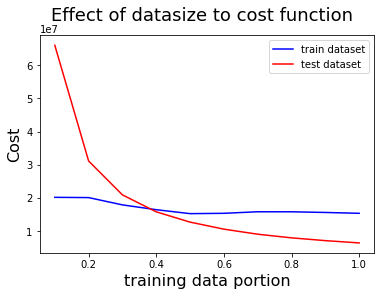

In [61]:
X_axis = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
plt.plot(X_axis,cost_train_list,'b',label= 'train dataset')
plt.plot(X_axis,cost_test_list,'r',label= 'test dataset')
plt.xlabel('training data portion',fontsize=16)
plt.ylabel('Cost',fontsize=16)
plt.suptitle('Effect of datasize to cost function',fontsize=18)
plt.legend(loc='upper right')
plt.show()

YOUR ANSWER HERE

We could see in the plot that when increasing the training data size, the cost of train dataset is only slightly reduced.
But the cost of test dataset is drastically decreased.This means using training data with larger sample size could increase the generalization of the model to avoid over fitting.
Large training datasize will also decrease the variance. The drawback of large training dataset is the high computational cost required for training.

bias & variance:

When the data has very few parameters, the model may have high bias and low variance, the model may tend to be underfitting. 
On the other hand, a model with large number of parameters may have high variance and low bias, the model may be overfitting.
Finding out the optimal balance of bias and variance could avoid overfitting and underfitting to improve the model performance.
